In [2]:
import pandas as pd
import glob

# Data import

In [3]:
df = pd.read_csv('data/NBA_Player_Dataset-2013-2021.csv')

box_cox_transformer = 0.1607080366321024 #need to pull from data_prep.ipynb

# Scale Data

In [4]:
#First scaling 2021 season to a full season
#roughly 10 games left for all teams out of 82

scale_factor = 1 + 10/82
#scale_factor = 1

#columns to scale

cols_to_scale = ['GP', 'FTA', '2PA', '3PA']

df[cols_to_scale] = df[cols_to_scale] * scale_factor

In [5]:
#variables we need to scale

x_to_scale = df[['AGE', 'GP', 'MPG', 'MIN%', 'USG%',
       'FTA', 'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%', 'TS%', 'PPG', 'RPG',
       'TRB%', 'APG', 'AST%', 'SPG', 'BPG', 'VI', 'TO_100_Games']]

#scaler function
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_to_scale)

x_scaled = scaler.transform(x_to_scale)

x_scaled_df = pd.DataFrame(x_scaled, columns = x_to_scale.columns)

In [6]:
#add the categorical features to scaled features for input
X_with_year = pd.concat([x_scaled_df, df[['Year', 'Center', 'Forward', 'Guard']]], axis = 1)

#choose our target variable
#y = df['Salary']
y = df['Salary_BoxCox']

# Read in results from models_final.ipynb

In [7]:
df_list = []

for file in glob.glob('results/*.csv'):
    temp_df = pd.read_csv(file)
    df_list.append(temp_df)

results_df = pd.concat(df_list, axis = 0)

In [8]:
#Remove the columns specific to certain models, all parameters are stored in 'params' column

results_df = results_df[['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'params', 
                        'mean_test_score', 'std_test_score', 'rank_test_score', 'Model Type', 'Training Data']]

In [9]:
#so far best model is RF with full dataset.  
results_df.sort_values('mean_test_score', ascending = True).to_csv('model_results.csv', index = False)
results_df.sort_values('mean_test_score', ascending = True).head(15)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_score,std_test_score,rank_test_score,Model Type,Training Data
9,6.268424,0.291347,0.088201,0.005809,"{'max_depth': 25, 'max_features': 10, 'n_estim...",9.148185,0.202884,1,Random Forest,Full Dataset
3,4.230464,0.088100,0.073199,0.003429,"{'max_depth': 10, 'max_features': 10, 'n_estim...",9.172347,0.211825,2,Random Forest,Full Dataset
8,2.445698,0.144679,0.043400,0.003008,"{'max_depth': 25, 'max_features': 10, 'n_estim...",9.181977,0.176333,3,Random Forest,Full Dataset
5,8.183368,0.518071,0.074601,0.003772,"{'max_depth': 10, 'max_features': 20, 'n_estim...",9.185676,0.215620,4,Random Forest,Full Dataset
11,9.557656,0.541475,0.073634,0.001832,"{'max_depth': 25, 'max_features': 20, 'n_estim...",9.198326,0.179902,5,Random Forest,Full Dataset
2,1.852591,0.320262,0.031801,0.002317,"{'max_depth': 10, 'max_features': 10, 'n_estim...",9.203888,0.198721,6,Random Forest,Full Dataset
4,3.499286,0.396439,0.035399,0.005537,"{'max_depth': 10, 'max_features': 20, 'n_estim...",9.208470,0.223478,7,Random Forest,Full Dataset
10,4.315410,0.069784,0.042802,0.004166,"{'max_depth': 25, 'max_features': 20, 'n_estim...",9.219631,0.178726,8,Random Forest,Full Dataset
7,3.679764,0.176141,0.098961,0.004070,"{'max_depth': 25, 'max_features': 5, 'n_estima...",9.221386,0.229243,9,Random Forest,Full Dataset
6,1.474543,0.058361,0.040600,0.001020,"{'max_depth': 25, 'max_features': 5, 'n_estima...",9.223172,0.205839,10,Random Forest,Full Dataset


In [10]:
#worst models
results_df.sort_values('mean_test_score', ascending = True).tail(15)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_score,std_test_score,rank_test_score,Model Type,Training Data
41,1.384793,0.050253,0.296631,0.016345,"{'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}",50.436944,4.067735,57,SVM,Full Dataset
44,1.230184,0.010186,0.239600,0.004841,"{'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}",100.884112,5.798606,56,SVM,Subset Dataset
41,1.245260,0.011759,0.239966,0.007104,"{'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}",100.918061,6.711417,57,SVM,Subset Dataset
50,1.384274,0.053852,0.282802,0.017997,"{'C': 10, 'gamma': 'auto', 'kernel': 'sigmoid'}",463.562443,36.662448,58,SVM,Full Dataset
47,1.392023,0.046768,0.288401,0.017895,"{'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}",520.176297,46.029433,59,SVM,Full Dataset
47,1.288599,0.048294,0.258568,0.023881,"{'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}",1002.214085,67.673235,58,SVM,Subset Dataset
50,1.236902,0.059438,0.245200,0.013875,"{'C': 10, 'gamma': 'auto', 'kernel': 'sigmoid'}",1002.429532,59.529284,59,SVM,Subset Dataset
56,1.424789,0.052959,0.279328,0.009446,"{'C': 100, 'gamma': 'auto', 'kernel': 'sigmoid'}",3913.287950,685.142338,60,SVM,Full Dataset
53,1.371933,0.052048,0.275657,0.016883,"{'C': 100, 'gamma': 'scale', 'kernel': 'sigmoid'}",4729.386173,510.797848,61,SVM,Full Dataset
56,1.523228,0.164177,0.268319,0.023041,"{'C': 100, 'gamma': 'auto', 'kernel': 'sigmoid'}",10009.943693,588.147454,60,SVM,Subset Dataset


In [11]:
#parameters for best model
best_params = results_df.sort_values('mean_test_score', ascending = True).iloc[0]['params']
best_params

"{'max_depth': 25, 'max_features': 10, 'n_estimators': 250}"

# Train model on previous years, predict on 2021 season

In [12]:
X_train = X_with_year[X_with_year['Year'] != 2021].drop('Year', axis = 1)
y_train = df['Salary_BoxCox'][df['Year'] != 2021]

X_test = X_with_year[X_with_year['Year'] == 2021].drop('Year', axis = 1)
y_test = df['Salary_BoxCox'][df['Year'] == 2021]

### Should remove outliers here

In [13]:
#remove outliers

### Train our best model

In [14]:
from sklearn.ensemble import RandomForestRegressor

rand_forest = RandomForestRegressor(max_depth =  25, max_features =  10, n_estimators = 250)

In [15]:
rand_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, max_features=10, n_estimators=250)

### Predict

In [16]:
y_pred = rand_forest.predict(X_test)

In [17]:
#invert our box cox transform so we go from normal distro to actual salary numbers.  
from scipy.special import inv_boxcox

y_pred_salary = inv_boxcox(y_pred, box_cox_transformer)
y_test_salary = inv_boxcox(y_test, box_cox_transformer)

In [18]:
results = pd.DataFrame(zip(y_test_salary, y_pred_salary), columns = ['True Salary', 'Predicted Salary'])
results['Error'] = results['Predicted Salary'] - results['True Salary']

#convert to ints for easy viewing
results[['True Salary', 'Predicted Salary', 'Error']] = results[['True Salary', 'Predicted Salary', 'Error']].astype(int)


In [19]:
player_team = df[['FULL NAME', 'TEAM']][df['Year'] == 2021].reset_index(drop = True)

In [20]:
predicting_2021 = pd.merge(player_team, results, left_index=True, right_index=True)

predicting_2021['Absolute Error'] = abs(predicting_2021['Error'])

In [23]:
predicting_2021.to_csv('2021_predictions.csv', index = False)

In [22]:
#Overpaid players (worst value players)
predicting_2021.sort_values('Error', ascending = True).head(25)

,FULL NAME,TEAM,True Salary,Predicted Salary,Error,Absolute Error
41,Kemba Walker,Nyk,34967442,6640586,-28326855,28326855
496,Blake Griffin,Bro,32405816,4466555,-27939261,27939261
304,Russell Westbrook,Lal,44211146,20123419,-24087726,24087726
412,Klay Thompson,Gol,37980719,14477454,-23503265,23503265
306,Kevin Love,Cle,31258255,9735912,-21522343,21522343
190,Tobias Harris,Phi,35995950,17968313,-18027636,18027636
108,Andrew Wiggins,Gol,31579390,13636873,-17942516,17942516
297,D'Angelo Russell,Min,30013500,13273958,-16739541,16739541
102,Damian Lillard,Por,39344899,23600758,-15744141,15744141
98,Kristaps Porzingis,Dal,31650599,15977554,-15673045,15673045


In [319]:
#Underpaid Players (Best value players)
predicting_2021.sort_values('Error', ascending = False).head(25)

,FULL NAME,TEAM,True Salary,Predicted Salary,Error
147,Reggie Jackson,Lac,10384500,18245142,7860642
8,Jalen Brunson,Dal,1802056,8933634,7131577
154,Andre Drummond,Phi,2401537,9245321,6843784
257,Jae'Sean Tate,Hou,1517980,8328127,6810146
453,Bobby Portis,Mil,4347599,11097838,6750238
100,Carmelo Anthony,Lal,2641690,8092503,5450812
94,Shai Gilgeous-Alexander,Okc,5495531,10937526,5441994
172,Jonas Valanciunas,Nor,13999999,19414463,5414463
131,LaMarcus Aldridge,Bro,2641690,7749771,5108080
327,Jusuf Nurkic,Por,12000000,16926399,4926399


In [320]:
#Best Predicted players
predicting_2021.sort_values('Absolute Error', ascending = True).head(25)

,FULL NAME,TEAM,True Salary,Predicted Salary,Error,Absolute Error
471,Damyean Dotson,Nyk,205661,204871,-790,790
421,Rayjon Tucker,Den,191859,190871,-988,988
177,Lamar Stevens,Cle,1517980,1513037,-4943,4943
501,Theo Pinson,Dal,440709,423218,-17491,17491
236,Anthony Lamb,San,136094,155832,19737,19737
383,Devon Dotson,Chi,239290,260176,20885,20885
175,Haywood Highsmith,Mia,547701,569001,21300,21300
233,Dewayne Dedmon,Mia,5256307,5280809,24501,24501
517,Chris Silva,Min,479649,454830,-24819,24819
193,Josh Christopher,Hou,2259239,2285453,26213,26213


In [321]:
#Group by team
team_predictions = predicting_2021.groupby('TEAM').sum().reset_index()

In [322]:
#Sorted by most overpaid/underperforming teams.  Looks about right.  
team_predictions.sort_values('Error', ascending = True)

,TEAM,True Salary,Predicted Salary,Error,Absolute Error
2,Bro,193623934,125698724,-67925211,90121109
5,Cle,133619543,74256201,-59363341,62607697
17,Min,137138787,78711608,-58427177,69243087
19,Nyk,133896797,75948949,-57947845,62355765
13,Lal,174024444,122048484,-51975967,83883947
9,Gol,166864003,115487664,-51376339,83991651
0,Atl,131733778,81406543,-50327232,58897534
28,Uta,153985488,103772983,-50212503,57962439
1,Bos,124653006,75737357,-48915640,50628136
27,Tor,121093789,75289916,-45803867,49788817


In [324]:
#Sorted by highest predicted salary
team_predictions.sort_values('Predicted Salary', ascending = False)

,TEAM,True Salary,Predicted Salary,Error,Absolute Error
16,Mil,157017294,132602051,-24415245,60713647
2,Bro,193623934,125698724,-67925211,90121109
13,Lal,174024444,122048484,-51975967,83883947
9,Gol,166864003,115487664,-51376339,83991651
24,Por,132364758,114304383,-18060379,47253355
28,Uta,153985488,103772983,-50212503,57962439
15,Mia,132886008,96905936,-35980072,52412134
4,Chi,119947377,95926283,-24021096,38453322
11,Ind,111106673,94674978,-16431698,39788766
29,Was,136294685,94257724,-42036953,54860681


# Viz

Who are the outliers in the distribution of error plot?  

<AxesSubplot:xlabel='Error', ylabel='Count'>

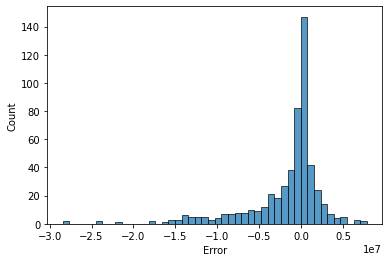

In [326]:
#viz
import seaborn as sns

sns.histplot(predicting_2021['Error'])